# Exercise - Visualization of Data

### Step 1. Import the necessary libraries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

### Step 2. Import the dataset from the AutoMPG dataset file. Assign it to a variable called mpg_df

In [3]:
url = "https://raw.githubusercontent.com/Premalatha-success/NIIT-Batch/main/auto-mpg.csv"
df = pd.read_csv(url)

### Step 3. Perform basic EDA to understand the structure of the data

In [4]:
df.shape

(398, 9)

In [5]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [6]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

### Step 4. Check and handle the missing values, if any.

In [8]:
df["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [9]:
df[df["horsepower"] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [12]:
df["horsepower"] = df["horsepower"].replace('?',np.nan)
df["horsepower"].replace(np.nan, df["horsepower"].median(), inplace=True)
df["horsepower"] = df["horsepower"].astype(float)
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

### Step 5. Create a plot to check the relationship between horsepower and acceleration. Note down your insight for the same. Beautify the graph using various customizations.

[]

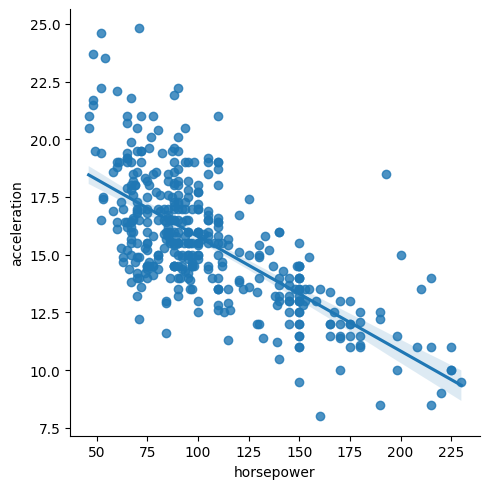

In [22]:
sns.lmplot(x = 'horsepower',y = 'acceleration', data=df)
plt.plot()
# acceleration and hoursepower has a linear relationship and we can see from the graph that the slope of the curve is negative

### Step 6. Generate subplots to display the histograms for acceleration, displacement and weight and kilometer_per_litre. Note down your insight for the same

array([[<AxesSubplot:title={'center':'acceleration'}>,
        <AxesSubplot:title={'center':'displacement'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'mpg'}>]], dtype=object)

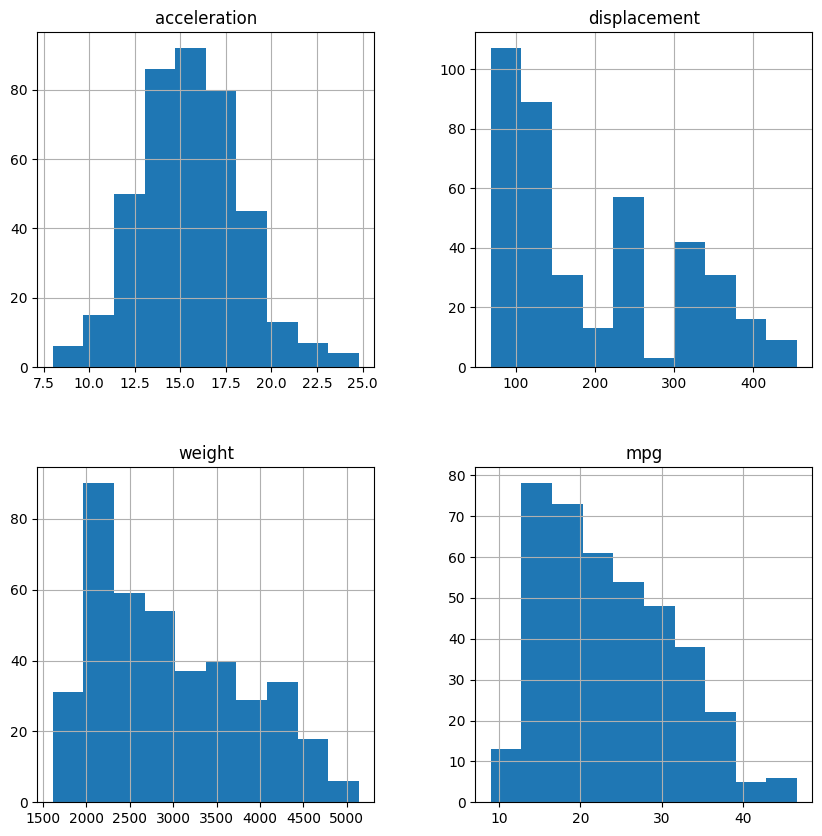

In [25]:
df[['acceleration', 'displacement', 'weight', 'mpg']].hist(figsize=(10,10))
# Acceleration is symmatrically distributed
# Displacement is more outliers
# weight is right skewed
# mpg is right skewed

### Step 7. Create a plot to check the relationship between displacement and weight for origin 2, color the datapoints based on no of cylinders. Note down your insight for the same and save the plot as an image file. 

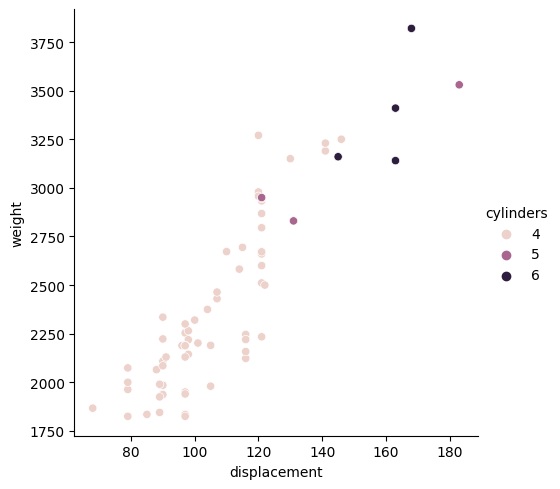

In [31]:
df[['displacement','weight','cylinders','origin']][df['origin'] == 2]
sns.relplot(x="displacement", y="weight", hue = "cylinders",
            data = df[['displacement','weight','cylinders','origin']][df['origin'] == 2])

plt.savefig('plot.png')

# weight and displacement have a linear relationship
# low values of cylinders have low weight
# as the number of cylinders increases weight and displacement also increases

### Step 8. Display the frequency distribution of the Origin variable. Note down your insight for the same

<AxesSubplot:xlabel='origin', ylabel='count'>

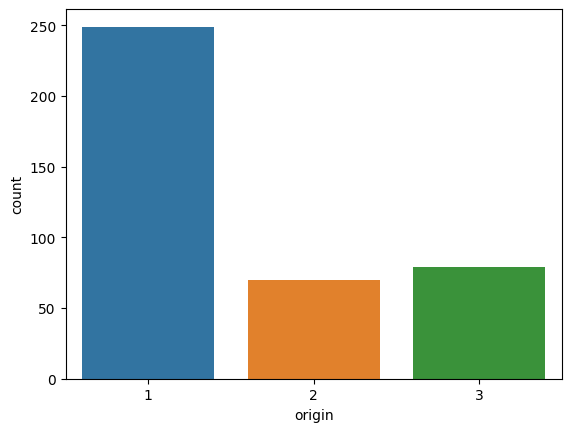

In [36]:
sns.countplot(x = 'origin', data=df)
# Origin 1 has most number of rows
# Origin 2 and 3 have relatively equal distribution but much smaller than origin 1

### Step 9. Check the relationship of multiple variables wrt kilometer_per_litre. Note down your insight for the same

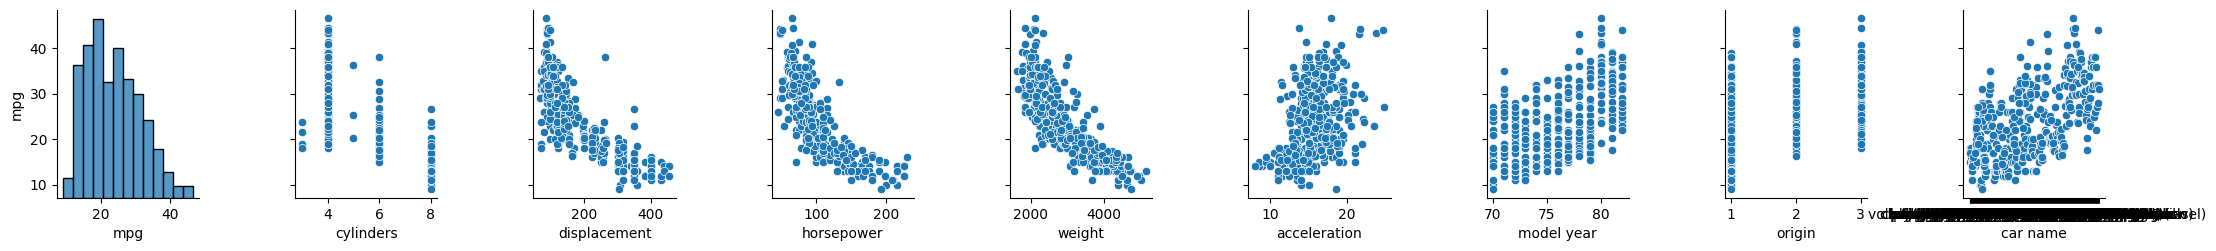

In [39]:
sns.pairplot(df, y_vars="mpg", x_vars=df.columns.values)

### Step 10. Display the average weight based on no of cylinders present. Note down the insight for the same

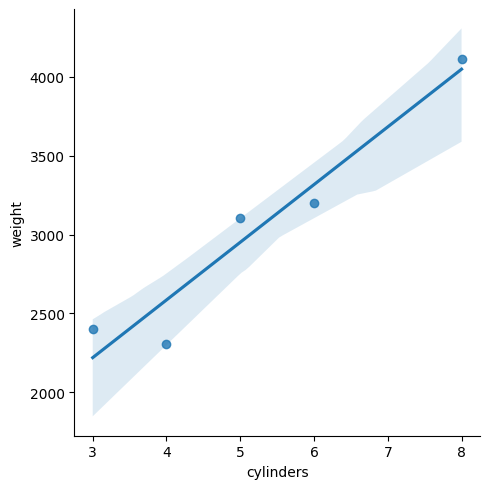

In [43]:
sns.lmplot(x='cylinders', y = 'weight', data = df[['weight','cylinders']].groupby('cylinders').mean().reset_index())

### Step 11. Check for the outliers in the dataset. Note down the insight for the same.

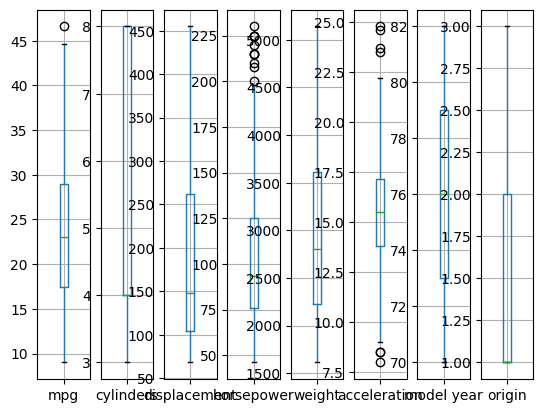

In [53]:
cols =df.columns.values[:-1]

for i,col in enumerate(cols):
    plt.subplot(1,len(cols),i+1,)
    df.boxplot(column=col)

plt.show()

### Step 12. Plot the correlations for variables.

<AxesSubplot:>

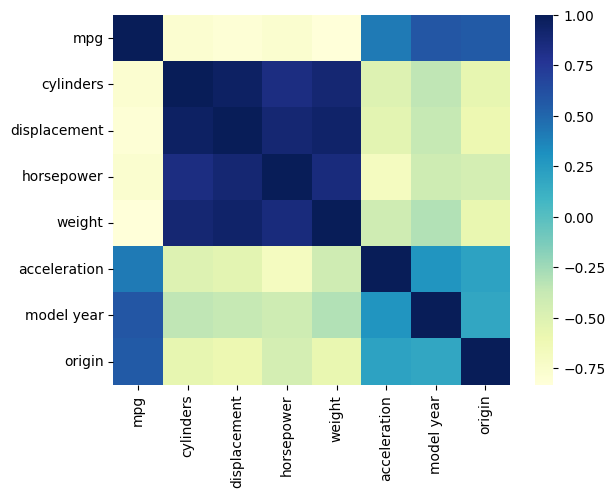

In [55]:
sns.heatmap(df.corr(), cmap='YlGnBu')